# MovieLens - Exploratory Data Analysis

In [44]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
# read the Movielens dataset in the csv folder

df = pd.read_csv('csv/dataframe.csv',index_col=0)  # index represented by column 0

df['date'] = pd.to_datetime(df['date']) # cast date into year-month-day format

In [46]:
df.head(5)

,userId,movieId,rating,date,title,genres,year
0,1,m31,2.5,2009-12-14,Dangerous Minds (1995),Drama,1995
1,7,m31,3.0,1996-12-29,Dangerous Minds (1995),Drama,1995
2,31,m31,4.0,2010-05-11,Dangerous Minds (1995),Drama,1995
3,32,m31,4.0,1996-06-15,Dangerous Minds (1995),Drama,1995
4,36,m31,3.0,1996-11-03,Dangerous Minds (1995),Drama,1995


In [47]:
# read movie dataset in the csv folder

df_mov = pd.read_csv('csv/dataframe_movie.csv',index_col = 0)

In [48]:
df_mov.head(5)

,movieId,title,genres,year
0,m1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,m2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,m3,Grumpier Old Men (1995),Comedy|Romance,1995
3,m4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,m5,Father of the Bride Part II (1995),Comedy,1995


## Distribution ratings over Users

In [49]:
ratings = df.groupby('rating')['userId'].count()
ratings /= ratings.sum()  # normalize

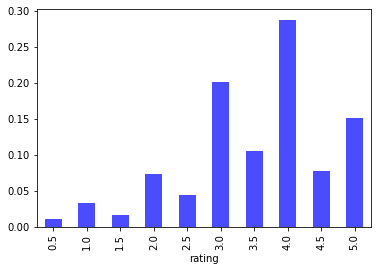

In [50]:
ratings.plot(kind = 'bar',color = 'b',alpha= 0.7)
plt.show()

We observe that most of the ratings are positive: 4.0 and 3.0.

## Distribution Movies

In [51]:
title_avg_score = df.groupby('title')['rating'].mean()
title_count = df.groupby('title')['rating'].count()

In [52]:
title_avg_score.sort_values(ascending=False).head()  # best rated movies on average

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

In [53]:
title_count.sort_values(ascending=False).head()    # most reviewed movies 

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [54]:
# create dataset with avg_score and count 

df_score = pd.DataFrame({'rating':title_avg_score, 'count':title_count})
df_score.reset_index(inplace=True)   # the index is not the title  

In [55]:
df_score.head()

,title,rating,count
0,"""Great Performances"" Cats (1998)",1.750000,2
1,$9.99 (2008),3.833333,3
2,'Hellboy': The Seeds of Creation (2004),2.000000,1
3,'Neath the Arizona Skies (1934),0.500000,1
4,'Round Midnight (1986),2.250000,2


In [56]:
# Round average rating

def rounded(x):
    if x - np.floor(x) <= 0.25:
        return np.floor(x)  

    elif x - np.floor(x) <= 0.5:
        return np.floor(x) + 0.5
    
    elif x - np.floor(x) <= 0.75:
        return np.ceil(x) - 0.5
    
    else:
        return np.ceil(x)

In [57]:
df_score['rating'] = df_score['rating'].apply(lambda x: rounded(x))

In [58]:
df_score.head()

,title,rating,count
0,"""Great Performances"" Cats (1998)",1.5,2
1,$9.99 (2008),4.0,3
2,'Hellboy': The Seeds of Creation (2004),2.0,1
3,'Neath the Arizona Skies (1934),0.5,1
4,'Round Midnight (1986),2.0,2


In [59]:
# Distribution of average ratings over all reviewd movies 

dist_avg_rat = df_score.groupby('rating')['count'].count()
dist_avg_rat /= dist_avg_rat.sum()   # Normalize

## Distribution average ratings over Movies

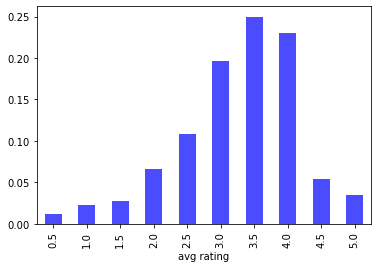

In [60]:
dist_avg_rat.plot.bar(color = 'b',label = None,alpha = 0.7)

plt.xlabel('avg rating')
plt.show()

In [61]:
df_score.sort_values(by=['count','rating'],ascending=False).head(5)

,title,rating,count
2933,Forrest Gump (1994),4.0,341
6391,Pulp Fiction (1994),4.5,324
7084,"Shawshank Redemption, The (1994)",4.5,311
7166,"Silence of the Lambs, The (1991)",4.0,304
7488,Star Wars: Episode IV - A New Hope (1977),4.0,291


## Distribution Genres across all movie catalog

In [62]:
genres = sorted(['Adventure','Animation','Children','Drama','Documentary','Horror','Musical','Thriller','Action',
              'Sci-Fi','War','Romance','Comedy','Crime','Fantasy','Western','Mystery','IMAX','Film-Noir'])

In [63]:
g = df.groupby('movieId')[['genres']].sum()

In [64]:
# sum the same genre across all movies and normalize 

temp = []

for i in genres:
    temp.append(g['genres'].apply(lambda x: i in x).sum()/len(g))

# sort in descending order
df_genre = pd.DataFrame(temp,index = genres).sort_values(by = 0,ascending=False)

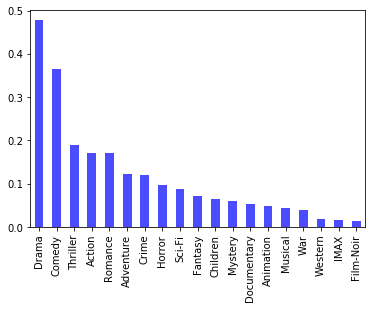

In [65]:
df_genre[0].plot(kind = 'bar',color = 'blue',alpha = 0.7)
plt.show()

## Time series Analysis

In [66]:
df_year = df.date.dt.to_period("Y")

In [67]:
year_ratings = df.groupby(df_year)['rating'].count().cumsum()
year_ratings /= year_ratings.max()

In [68]:
year_title = df_mov.groupby('year')['title'].count().cumsum()

In [69]:
year_title /= year_title.max()

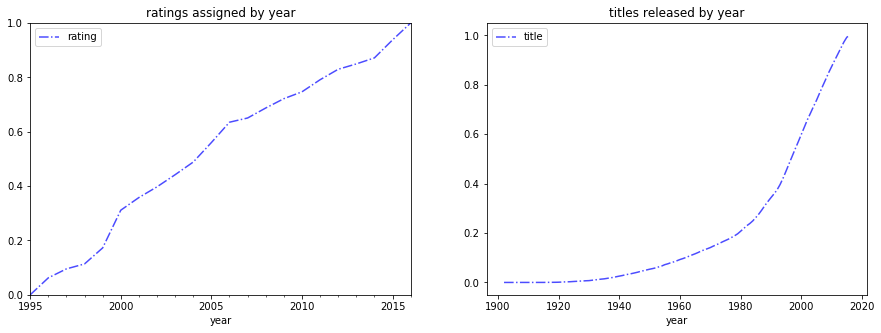

In [70]:
plt.subplots(1,2,figsize = (15,5))

plt.subplot(121)
year_ratings.plot(style = 'b-.',alpha = 0.7)
plt.ylim((0,1))
plt.xlim(('1995-01','2016-08'))
plt.legend()
plt.title('ratings assigned by year')
plt.xlabel('year')

plt.subplot(122)
year_title.plot(style = 'b-.',alpha= 0.7)
plt.legend()
plt.title('titles released by year')
plt.xlabel('year')
plt.show()

## User activity

In [71]:
year_user = pd.Series(df.groupby(df_year)['userId'])

In [72]:
temp = []

for i in range(22):
    temp.append(year_user[i][1].nunique())

year_user = pd.DataFrame(temp,index = year_ratings.index,columns = ['userId'])

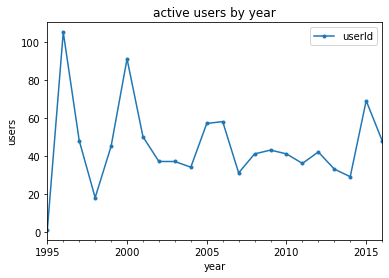

In [73]:
year_user.plot(style = '.-')

plt.title('active users by year')
plt.ylabel('users')
plt.xlabel('year')
plt.legend()
plt.show()

To acknowledge use of the dataset in publications, I cite the following paper:

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets:
History and Context. ACM Transactions on Interactive Intelligent
Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages.
DOI=http://dx.doi.org/10.1145/2827872